In [1]:
import pickle
import os
import numpy as np
import torch
import pandas as pd
from tqdm import tqdm

In [30]:
%load_ext line_profiler

In [2]:
from plot_utils import *

In [3]:
from importlib import reload
import plot_utils
reload(plot_utils)
from plot_utils import *

In [4]:
from data_collapse import *


In [5]:
from importlib import reload

import data_collapse
reload(data_collapse)
from data_collapse import *

# Load data

## threshold 1e-6 with complex64

In [73]:
params_list=[
({'xj':'0','en':2000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(1),'L':np.array([8,12,16])}),
({'xj':'0','en':1000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([20])}),
# ({'xj':'0','en':500,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(4),'L':np.array([20])}),
# ({'xj':'0','en':60,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(32),'L':np.array([24])})
]
for fixed_params,vary_params in params_list:
    data_0_S0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}.pickle',
        fn_dir_template='Data/Metrics/{xj}_S0/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        data_dict_file='xj({xj}){"_anc"*anc}.pickle', 
    )


df_0_S0=convert_pd(data_0_S0_dict,names=['Metrics','L','p_ctrl','p_proj'])


Loading data_dict Data/Metrics/0_S0/xj(0).pickle


generate_params: 100%|██████████| 11163/11163 [00:00<00:00, 17836.77it/s]


Loading data_dict Data/Metrics/0_S0/xj(0).pickle


generate_params: 100%|██████████| 7442/7442 [00:00<00:00, 15672.19it/s]


In [74]:
len(data_0_S0_dict['fn'])

480

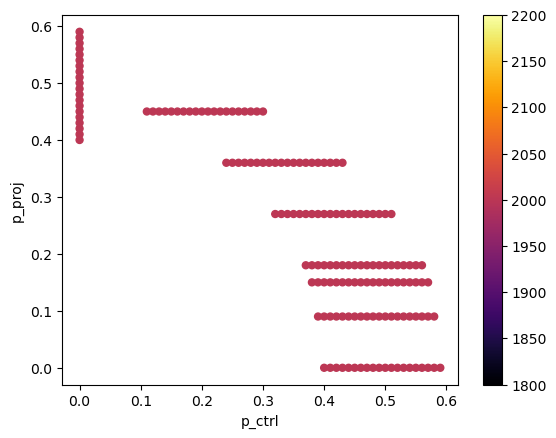

In [75]:
visualize_dataset(df_0_S0,params={'Metrics':'O','L':16},xlabel='p_ctrl',ylabel='p_proj')

## load all singular value

In [34]:
params_list=[
({'xj':'0','en':2000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(1),'L':np.array([8,12,16])}),
({'xj':'0','en':500,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(4),'L':np.array([20])}),
({'xj':'0','en':30,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(64),'L':np.array([24])})
]

data_0_S0_sv_dict={'fn':set()}
for fixed_params,vary_params in params_list:
    # pass
    data_0_S0_sv_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_128{"_anc"*anc}_sv.pickle',
        fn_dir_template='Data/Metrics/{xj}_sv/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_0_S0_sv_dict,
        # data_dict_file='xj({xj})_128{"_anc"*anc}.pickle', 
    )


generate_params: 100%|██████████| 11163/11163 [01:38<00:00, 113.64it/s]


In [166]:
params_list=[
({'xj':'0','en':2000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0.36,0.36,61),'s':np.arange(1,2),'L':np.array([8,12,16])}),
({'xj':'0','en':500,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0.36,0.36,61),'s':np.arange(4,8),'L':np.array([20])}),
({'xj':'0','en':30,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0.36,0.36,61),'s':np.arange(64,128),'L':np.array([24])})
]

data_0_S0_sv_2_dict={'fn':set()}
for fixed_params,vary_params in params_list:
    # pass
    data_0_S0_sv_2_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_128{"_anc"*anc}_sv.pickle',
        fn_dir_template='Data/Metrics/{xj}_sv/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_0_S0_sv_2_dict,
        # data_dict_file='xj({xj})_128{"_anc"*anc}.pickle', 
    )


generate_params: 100%|██████████| 238144/238144 [00:12<00:00, 18714.96it/s]


In [24]:
fns=set(os.listdir('Data/Metrics/0_sv'))

In [25]:
len(data_0_S0_sv_dict['fn'])

12756

In [26]:
[fn for fn in fns-data_0_S0_sv_dict['fn'] if '128' in fn]

[]

In [ ]:
data_0_S0_sv_dict_test

In [62]:
df_0_S0_sv={}
for threshold in tqdm([1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]):
    df_0_S0_sv[threshold]=convert_pd_0(data_0_S0_sv_dict,names=['Metrics','L','p_ctrl','p_proj'],threshold=threshold)

  0%|          | 0/12 [00:00<?, ?it/s]/mnt/d/Rutgers/control_transition/plot_utils.py:237: RuntimeWarning: divide by zero encountered in log
  else:
100%|██████████| 12/12 [23:23:34<00:00, 7017.85s/it]   


In [169]:
df_0_S0_sv_2={}
for threshold in tqdm([1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]):
    df_0_S0_sv_2[threshold]=convert_pd_0(data_0_S0_sv_2_dict,names=['Metrics','L','p_ctrl','p_proj'],threshold=threshold)

100%|██████████| 12/12 [00:03<00:00,  3.29it/s]


In [ ]:
df_0_S0_sv={threshold:convert_pd_0(data_0_S0_sv_dict,names=['Metrics','L','p_ctrl','p_proj'],threshold=threshold) for threshold in [1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]}

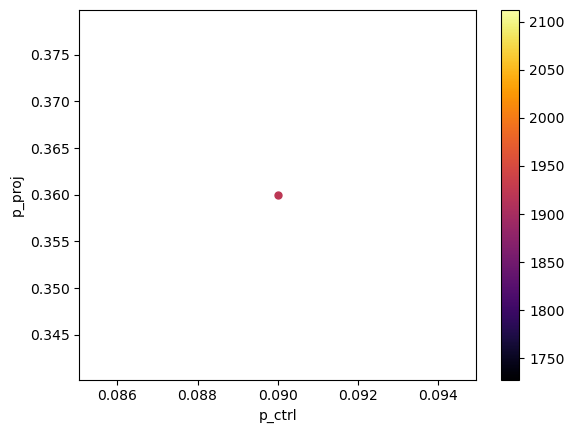

In [173]:
visualize_dataset(df_0_S0_sv_2[1e-15],params={'Metrics':'TMI','L':24},xlabel='p_ctrl',ylabel='p_proj')

In [64]:
with open('Data/Metrics/0_sv/df_0_S0_sv.pickle','wb') as f:
    pickle.dump(df_0_S0_sv,f)

: 

In [6]:
with open('Data/Metrics/0_sv/df_0_S0_sv.pickle','rb') as f:
    df_0_S0_sv=pickle.load(f)

# Plot

## TMI mean

In [86]:
import matplotlib.pyplot as plt

(-1.2, 0.1)

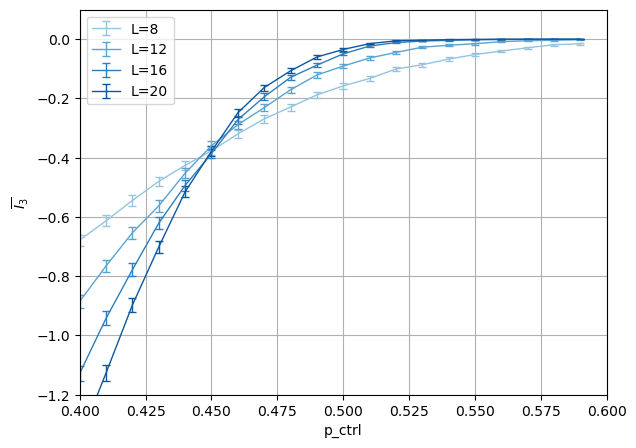

In [95]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])
plt.gca().set_ylim([-1.2,0.1])


(-1.8, 0.1)

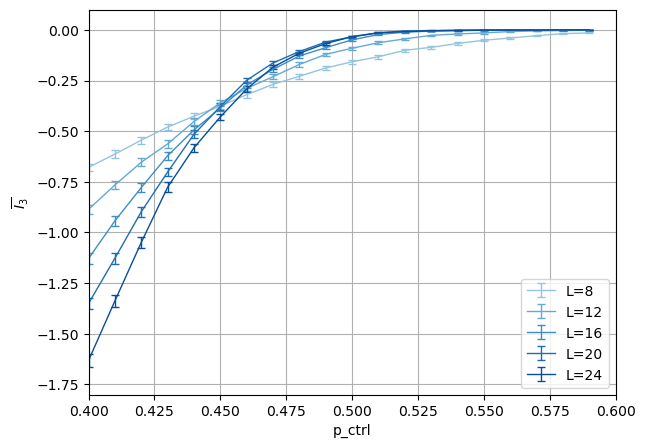

In [93]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])
plt.gca().set_ylim([-1.8,0.1])


(0.4, 0.6)

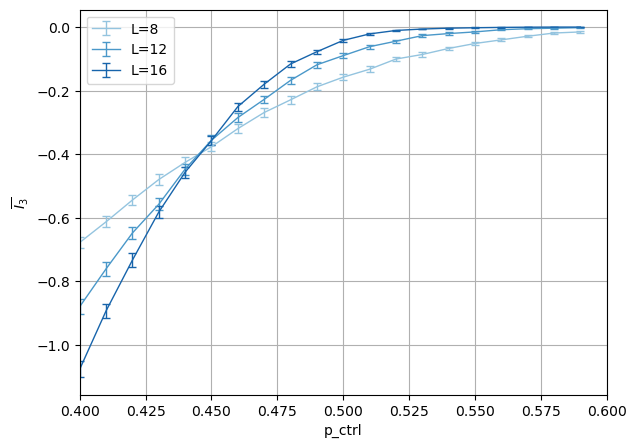

In [118]:
plot_line_inset(df=df_0_S0_sv[1e-7],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])

(0.4, 0.59)

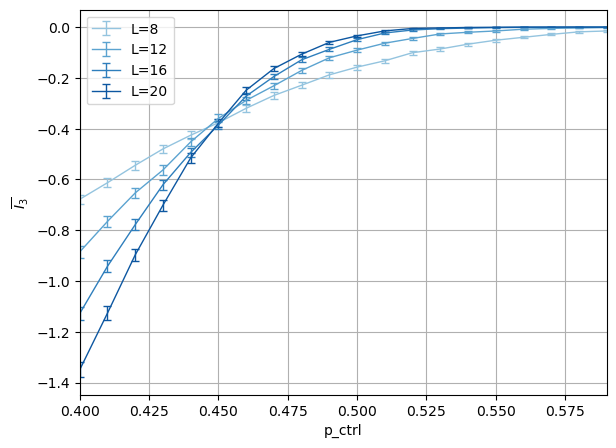

In [130]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.59])

(0.37, 0.57)

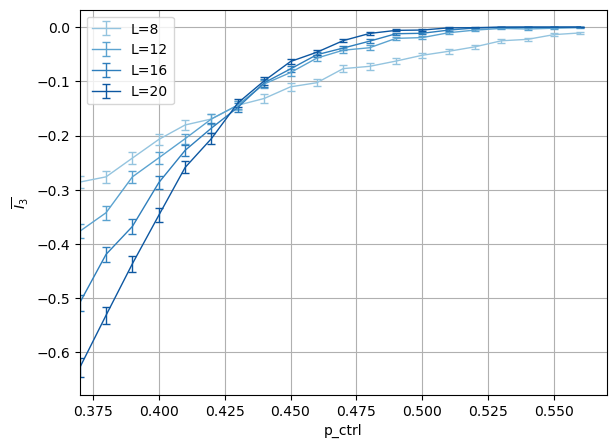

In [135]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.18},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.37,.57])

(0.24, 0.43)

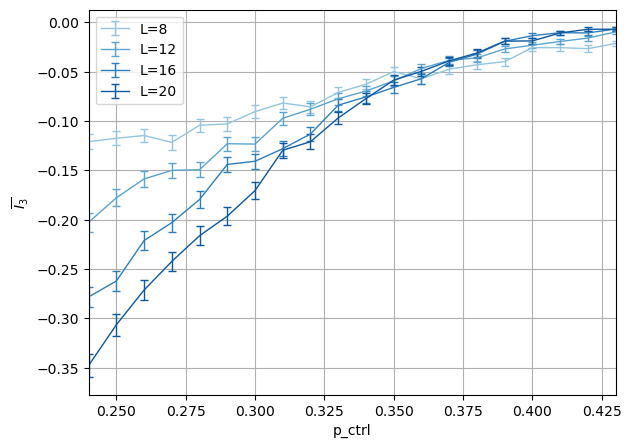

In [160]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.36},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.24,.43])

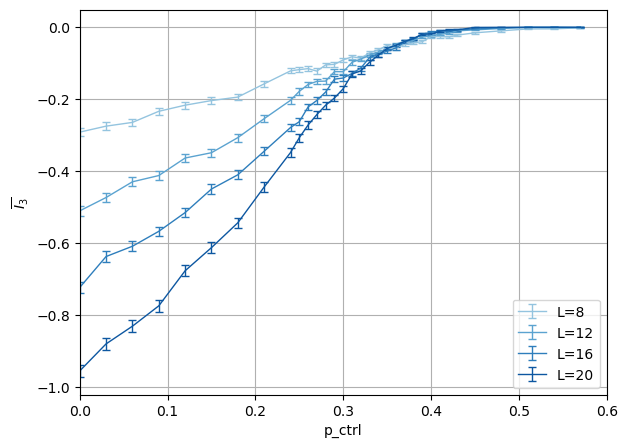

In [181]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.36},
yscale=None,
errorbar=True,
filename=None,
)
# plt.gca().set_xlim([.24,.43])
# plt.gca().set_ylim([-0.4,0.])


In [ ]:
2 things to verify:
1. change another set of seed for L=24
2. increase ensemble sizes
3. it simply looks weird for p_proj=0.18

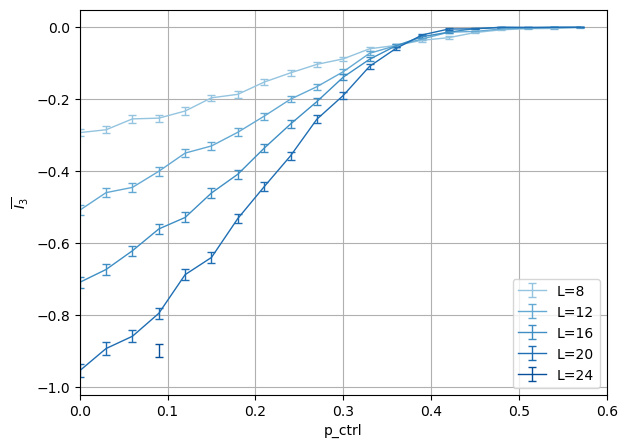

In [180]:
plot_line_inset(df=df_0_S0_sv_2[1e-15],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.36},
yscale=None,
errorbar=True,
filename=None,
)
# plt.gca().set_xlim([.24,.43])
# plt.gca().set_ylim([-0.4,0.])


(0.37, 0.57)

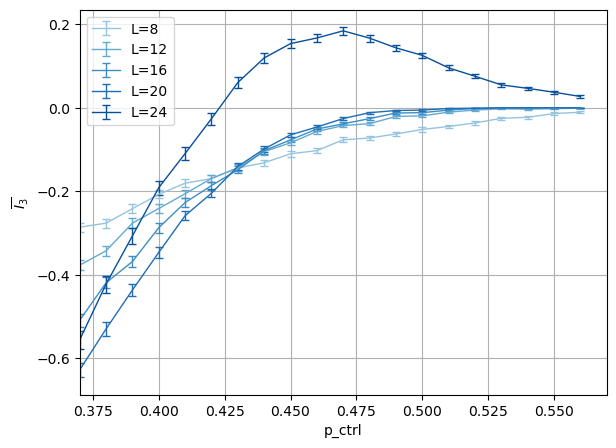

In [178]:
plot_line_inset(df=df_0_S0_sv[1e-14],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.18},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.37,0.57])

100%|██████████| 12/12 [00:00<00:00, 20.26it/s]


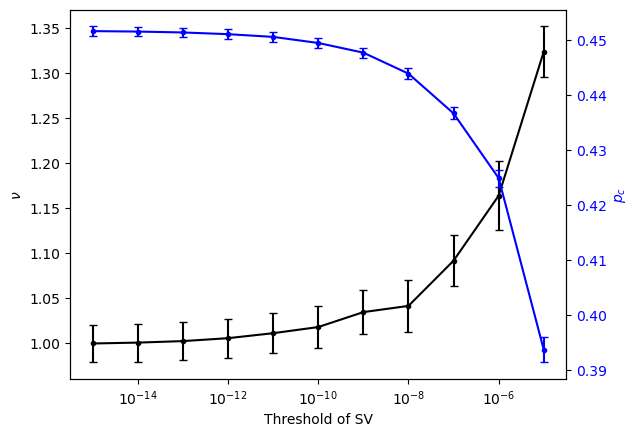

In [ ]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.00},p_range=[0.4,0.6],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.451)

plot_extrapolate_fitting(dc)

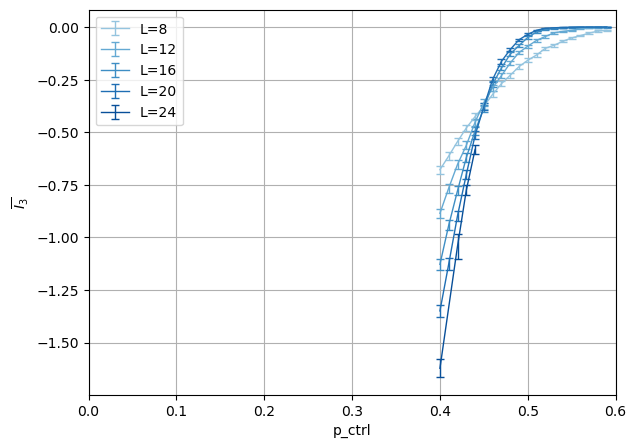

In [8]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.0},
yscale=None,
errorbar=True,
filename=None,
)
# plt.gca().set_xlim([0.32,0.52])

In [9]:
dc=DataCollapse(df=df_0_S0_sv[1e-14],params={'Metrics':'TMI','p_proj':0.27},Lmin=12,Lmax=24,p_range=[0.32,0.52],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.401,)

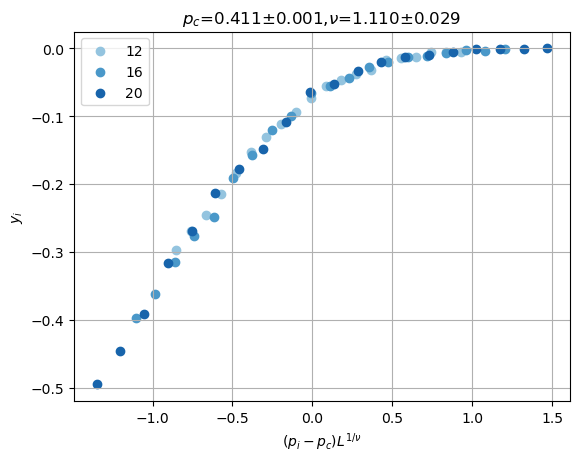

In [10]:
dc.plot_data_collapse()

(0.24, 0.44)

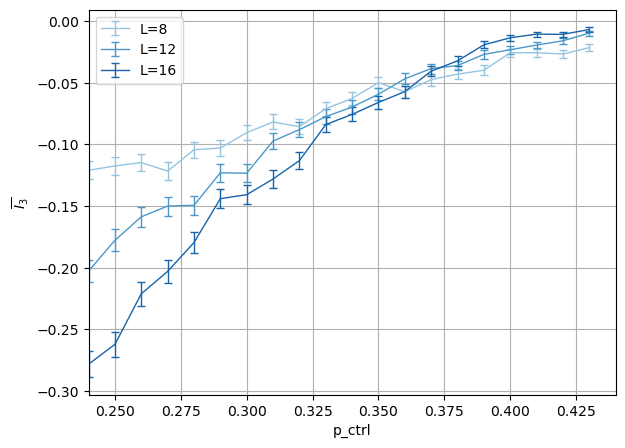

In [201]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.36},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.24,0.44])

(0.11, 0.31)

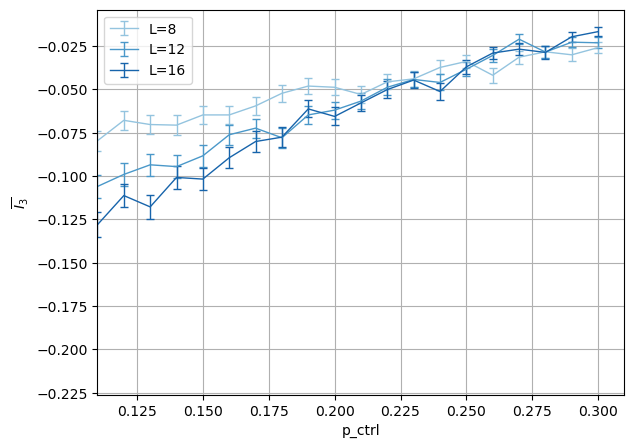

In [204]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.45},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.11,0.31])

(0.24, 0.44)

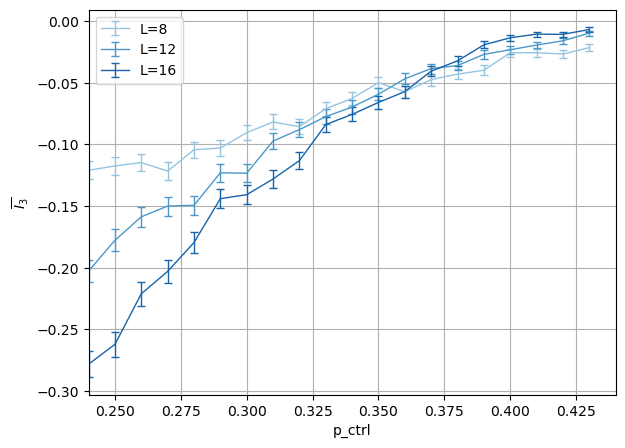

In [136]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.36},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.24,0.44])

(0.11, 0.31)

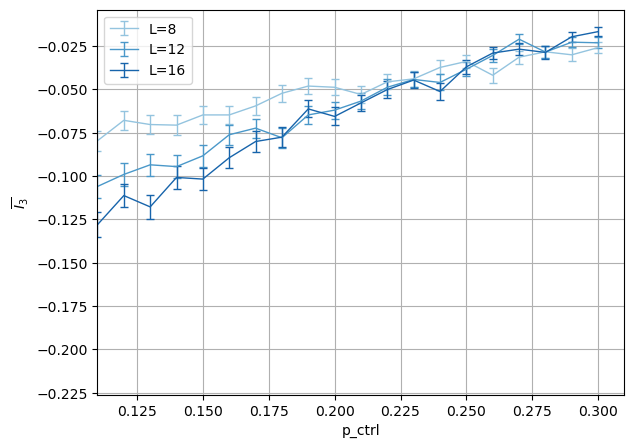

In [139]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.45},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.11,0.31])

(0.4, 0.6)

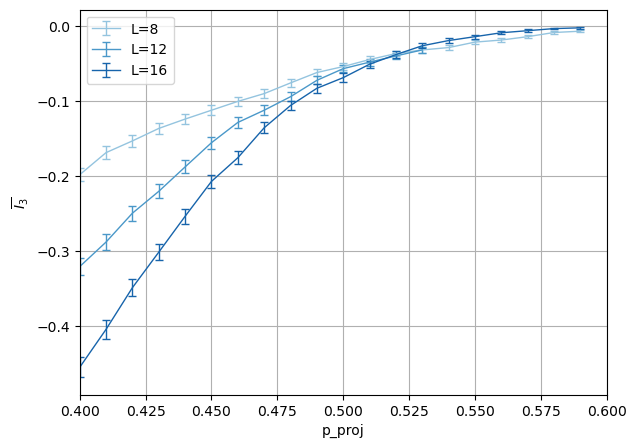

In [175]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])


## EE

(0.32, 0.51)

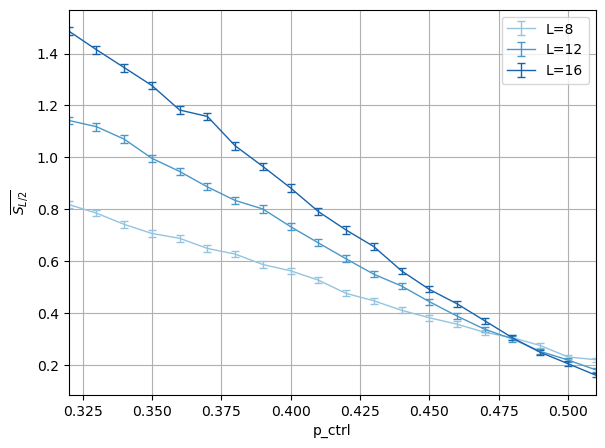

In [96]:
plot_line_inset(df=df_0_S0_sv[1e-6],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='EE',
x_name='p_ctrl',
fixed_params={'p_proj':.27},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.32,.51])


# Data collapse

### TMI mean (ent)

##### $p_{proj}$=0.00

In [166]:
dc_TMI_opt=optimal_df(names=['Metrics', 'p_proj', 'p_ctrl'])

##### $p_{proj}$=0.00

In [62]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0},Lmin=12,Lmax=20,p_range=[0.4,0.6],p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.0,p_c=0.451,)

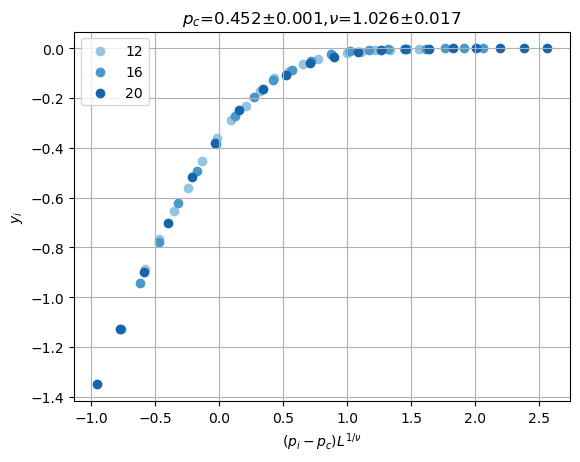

In [63]:
dc.plot_data_collapse()

In [169]:
dc_O_opt.add_optimal(dc)

In [170]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.09},p_range=[0.39,0.59],Lmin=12,Lmax=20,p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.421,)

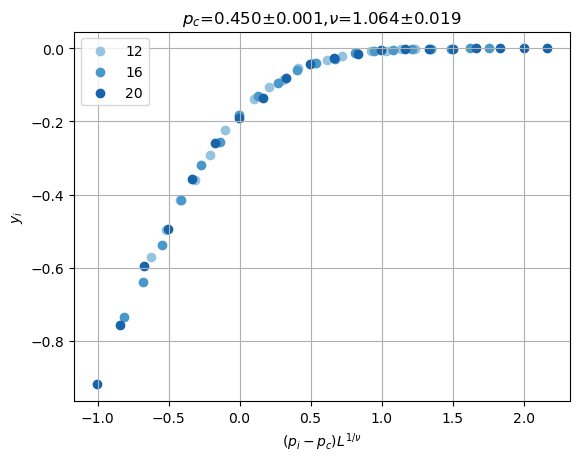

In [171]:
dc.plot_data_collapse()

In [172]:
dc_O_opt.add_optimal(dc)

In [173]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.18},p_range=[0.37,0.57],Lmin=12,Lmax=20,p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.421,)

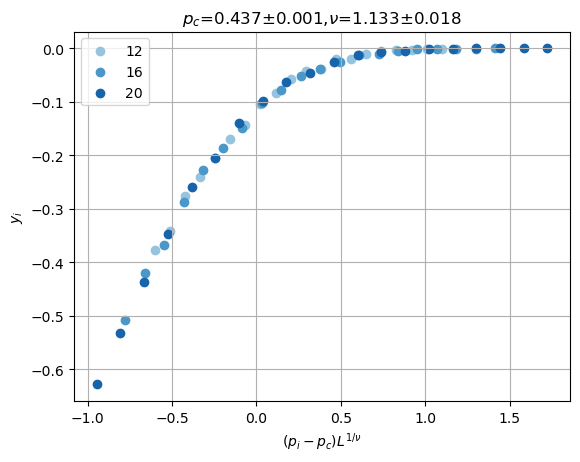

In [175]:
dc.plot_data_collapse()

In [176]:
dc_O_opt.add_optimal(dc)

In [177]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.27},p_range=[0.32,0.52],Lmin=12,Lmax=20,p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.401)

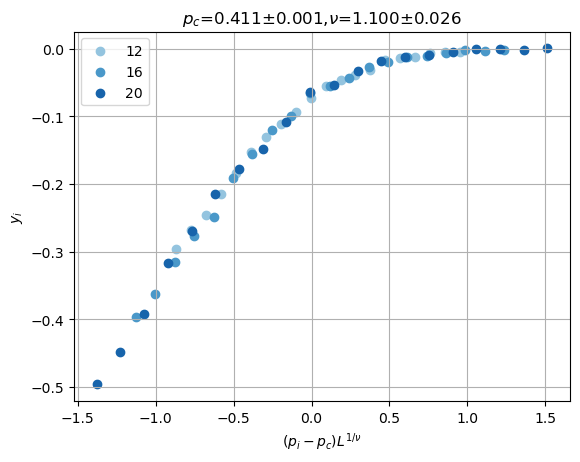

In [178]:
dc.plot_data_collapse()

In [179]:
dc_O_opt.add_optimal(dc)

In [180]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.36},p_range=[0.24,0.44],Lmin=12,Lmax=20,p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.351)

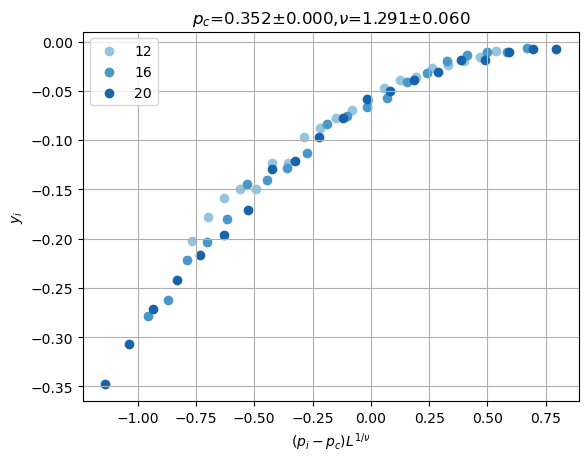

In [181]:
dc.plot_data_collapse()

In [182]:
dc_O_opt.add_optimal(dc)

In [185]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.45},p_range=[0.11,0.31],Lmin=12,Lmax=20,p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.215)

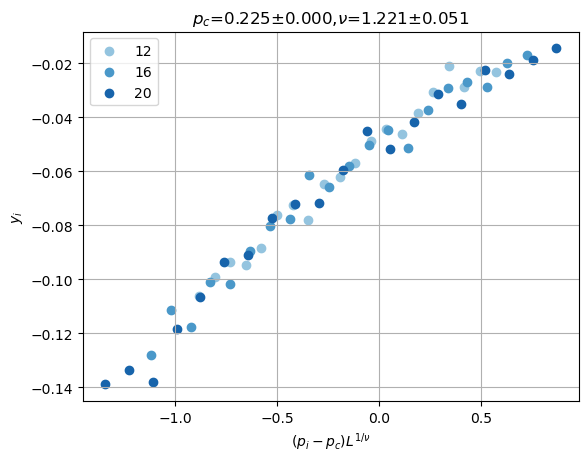

In [186]:
dc.plot_data_collapse()

In [187]:
dc_O_opt.add_optimal(dc)

In [188]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.},p_range=[0.4,0.6],Lmin=12,Lmax=20,p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.501)

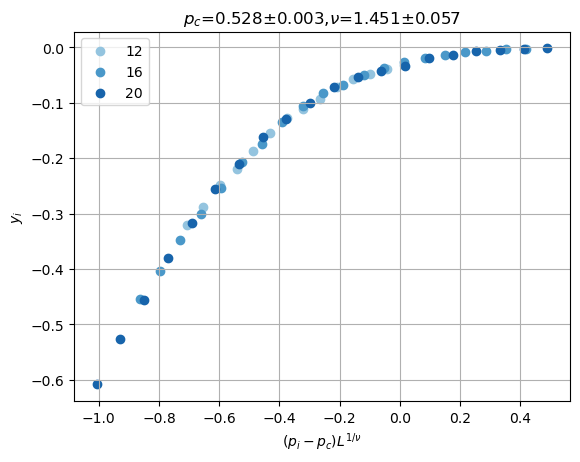

In [189]:
dc.plot_data_collapse()

In [190]:
dc_O_opt.add_optimal(dc)

In [194]:
with open('datacollapse_0_S0.pickle','wb') as f:
    pickle.dump(dc_O_opt.opt_df,f)

In [145]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.36},Lmin=12,Lmax=20,p_range=[0.24,0.44],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.351,)

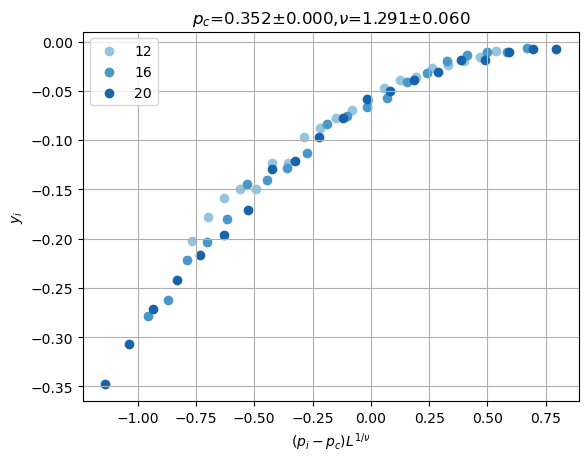

In [146]:
dc.plot_data_collapse()

# Extrapolation of fitting

In [99]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.00},p_range=[0.4,0.54],Lmin=12,Lmax=24,p_='p_ctrl',L_='L')
# dc.datacollapse(nu=1.0,p_c=0.451,)
dc.datacollapse_with_drift_GLS(n1=2,n2=2,p_c=0.451,nu=1.05,y=2)


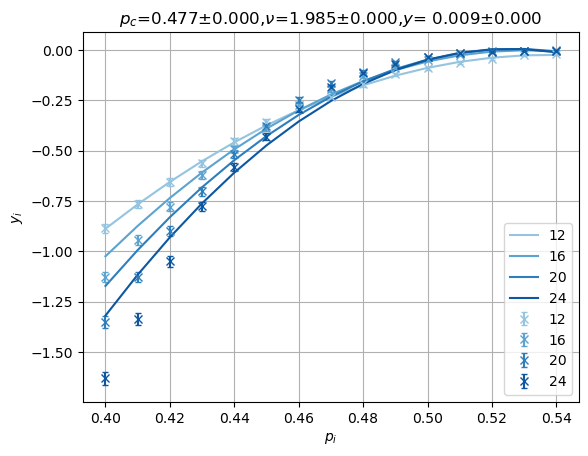

In [100]:
dc.plot_data_collapse(drift=True)  

 19%|█▊        | 5/27 [00:00<00:00, 47.86it/s]

Fitting Failed for (n1=1,n2=1)


100%|██████████| 27/27 [00:10<00:00,  2.65it/s]


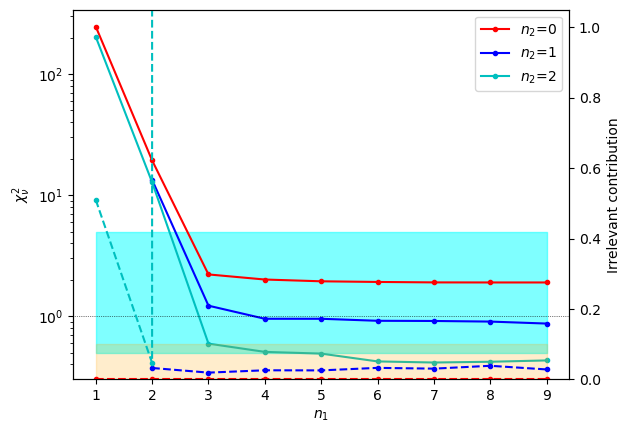

In [158]:
model=grid_search(n1_list=np.arange(1,10),n2_list=np.arange(3),p_c=0.451,nu=1.05,y=2.5,verbose=False,df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.0},Lmin=8,Lmax=24,p_range=[0.4,0.54],p_='p_ctrl',L_='L')
plot_chi2_ratio(model)

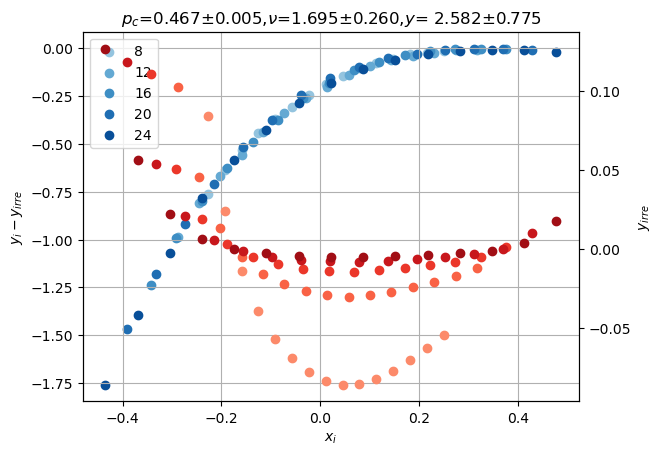

In [165]:
model[6,1].plot_data_collapse(drift=True,driftcollapse=True)  

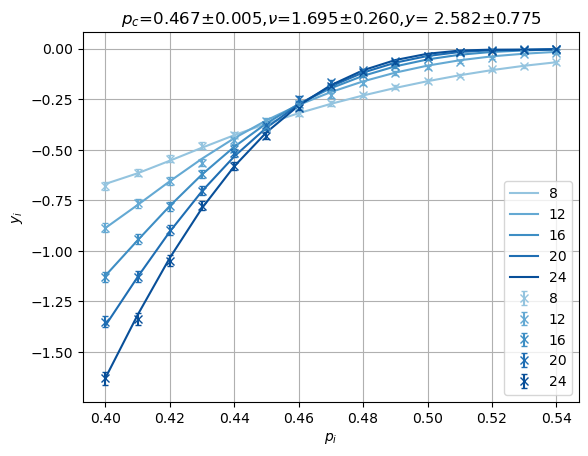

In [164]:
model[6,1].plot_data_collapse(drift=True)  

In [ ]:
model[3,1].res

100%|██████████| 12/12 [00:00<00:00, 93.98it/s]


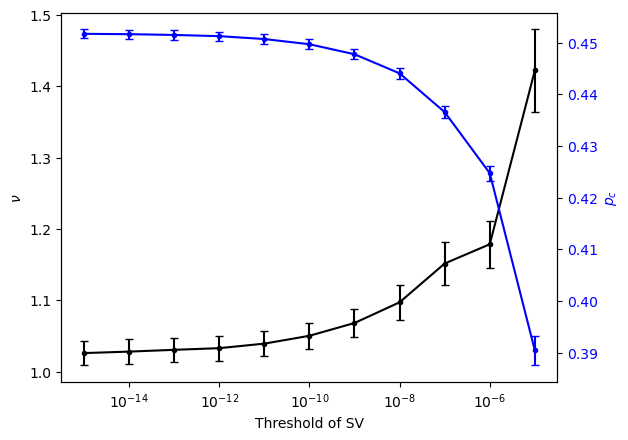

In [35]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.00},p_range=[0.4,0.6],Lmin=12,Lmax=20,threshold=(1e-16,1),nu=1.3,p_c=0.451,p_='p_ctrl',L_='L')

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 116.19it/s]


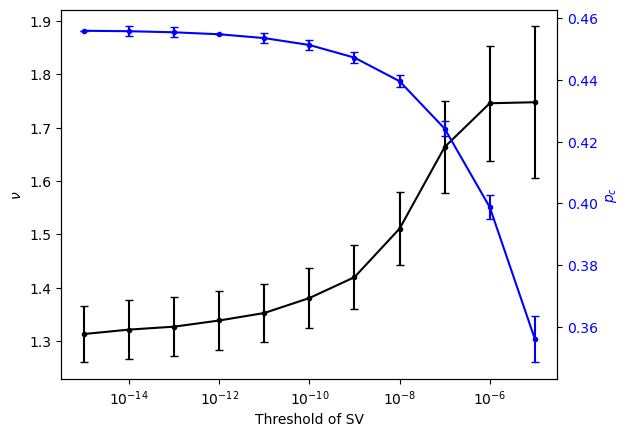

In [36]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.00},p_range=[0.4,0.6],Lmin=16,Lmax=20,threshold=(1e-16,1),nu=1.3,p_c=0.451,p_='p_ctrl',L_='L')

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 23.88it/s]


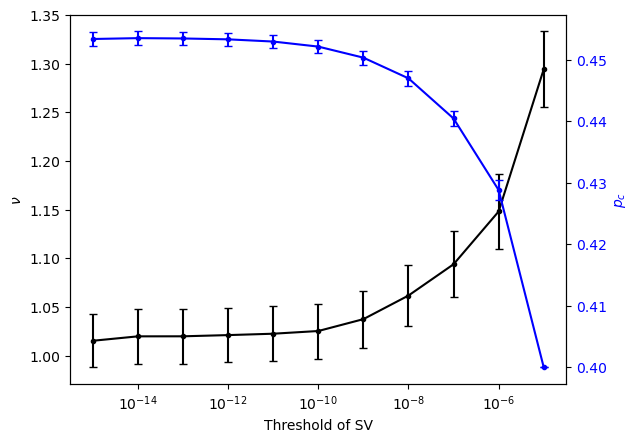

In [177]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.09},p_range=[0.39,0.59],Lmin=12,Lmax=24,threshold=(1e-16,1))

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 58.48it/s]


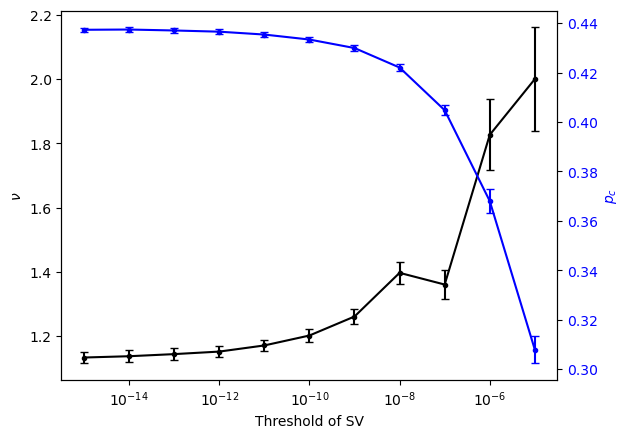

In [74]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.18},p_range=[0.37,0.57],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.421)

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 58.22it/s]


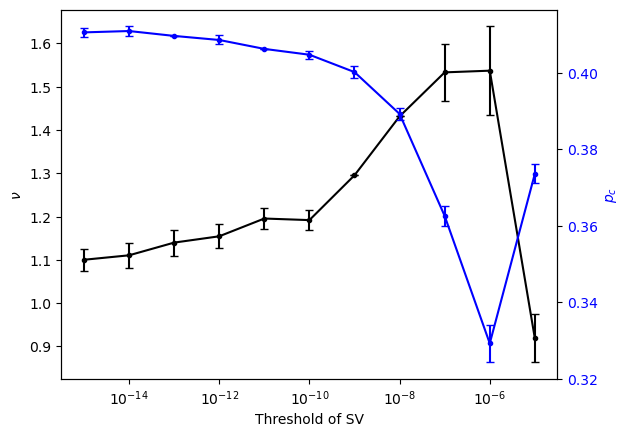

In [75]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.27},p_range=[0.32,0.52],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.401)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 66.52it/s]


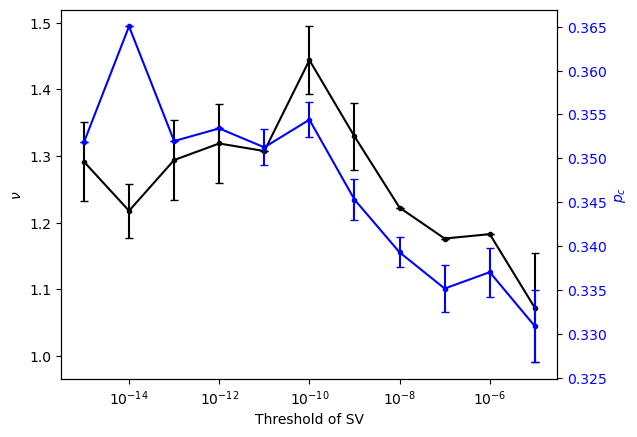

In [76]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.36},p_range=[0.24,0.44],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.351)

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 61.11it/s]


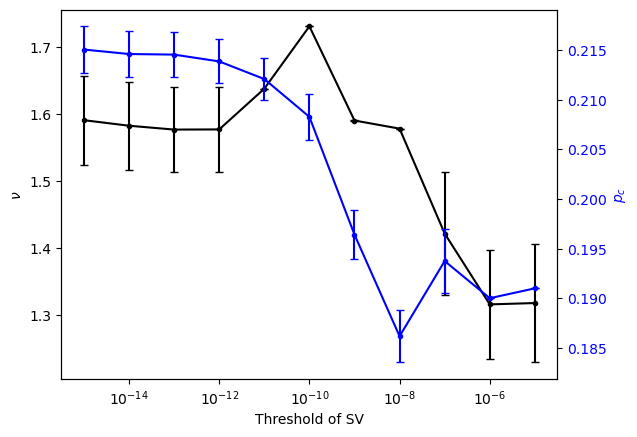

In [77]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.45},p_range=[0.11,0.31],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.201)

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 21.23it/s]


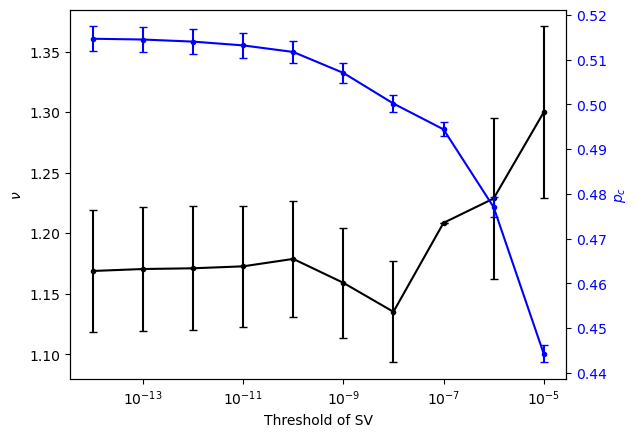

In [172]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_ctrl':0.},p_range=[0.4,0.6],Lmin=12,Lmax=24,threshold=(1e-15,1),nu=1.3,p_c=0.451)
plot_extrapolate_fitting(dc)

In [174]:
df_0_S0_sv[1e-15].xs(key=0,level='p_ctrl')

,,,observations
Metrics,L,p_proj,
O,8,0.40,"[0.10898701909030212, 0.011108692007958665, -0..."
TMI,8,0.40,"[0.0, 0.0, -0.6931471824645996, 0.0, 0.0, 0.0,..."
EE,8,0.40,"[0.6931471824645996, 0.6931471824645996, 1.386..."
O,16,0.40,"[-0.034130786917798764, -0.026762295286786558,..."
TMI,16,0.40,"[0.0, -1.3862943649291992, 0.0, -0.69314718246..."
...,...,...,...
EE,12,0.52,"[0.6931471824645996, 0.6931471824645996, 0.693..."
TMI,12,0.52,"[0.0, 0.0, 0.0, -0.6931471824645996, 0.0, 0.0,..."
O,12,0.53,"[0.016423049352043934, 0.1856791321890423, 0.1..."


In [17]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.27},Lmin=12,Lmax=24,p_range=[0.4,0.59],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.451,)

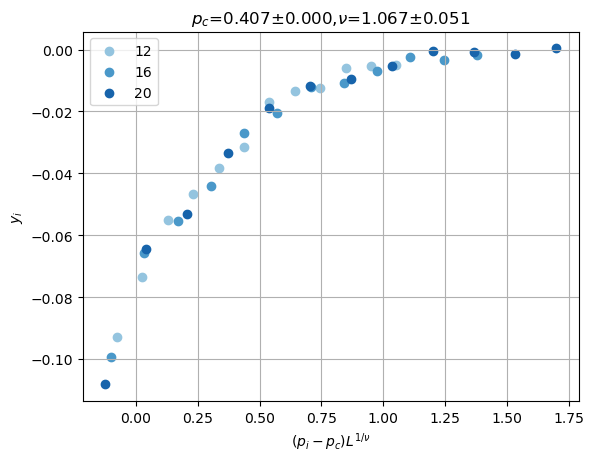

In [18]:
dc.plot_data_collapse()

In [11]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0},Lmin=12,Lmax=24,p_range=[0.4,0.59],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.451,)

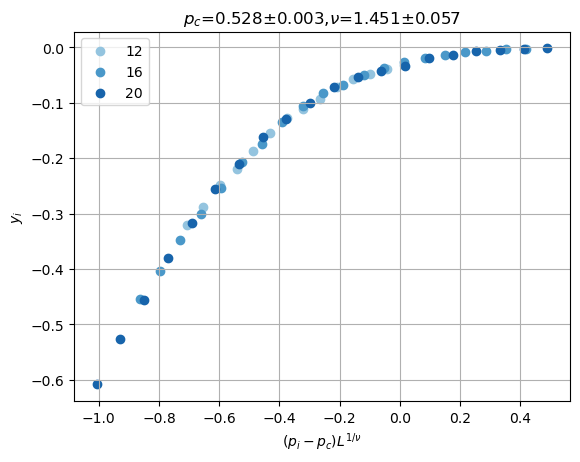

In [12]:
dc.plot_data_collapse()

In [13]:
dc=DataCollapse(df=df_0_S0_sv[1e-10],params={'Metrics':'TMI','p_ctrl':0},Lmin=12,Lmax=24,p_range=[0.4,0.59],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.451,)

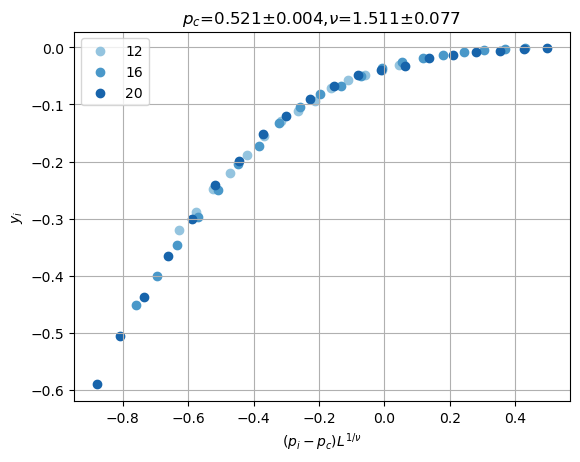

In [14]:
dc.plot_data_collapse()

# Bootstrapping

In [19]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0},Lmin=12,Lmax=20,p_range=[0.4,0.6],p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.05,p_c=0.451,)

In [24]:
resampling=[bootstrapping(df_0_S0_sv[1e-14],params={'Metrics':'TMI','p_proj':0},p_='p_ctrl',L_='L',p_range=[0.4,0.6],nu=1.05,p_c=0.451,rng=idx) for idx in range(100)]

In [25]:
p_c_list=[r.res.params['p_c'].value for r in resampling]
nu_list=[r.res.params['nu'].value for r in resampling]

In [26]:
np.mean(p_c_list),np.mean(nu_list)

(0.45256822371428357, 1.053129328060447)

In [27]:
np.std(p_c_list),np.std(nu_list)

(0.0010367271068500352, 0.02294329335881997)